In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm
import seaborn as sns
import pycountry
#import geopandas
import datetime
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
from scipy.stats import mode

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# for Interactive Shells
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px

In [6]:
#loading data
try:
    dfn = pd.read_csv('netflix_titles.csv')
    dfd = pd.read_csv('disney_plus_titles.csv')
except:
    dfn = pd.read_csv('netflix_titles.csv', sep='\t')
    dfd = pd.read_csv('disney_plus_titles.csv', sep='\t')

In [7]:
#making a function for examining data
def data_research(data, data_name='data', un=False, miss=False):
    #basic
    print(f'Examining "{data_name}"')
    display(data.head(3))
    #display(data.info())
    #display(data.describe( include='all'))
    #display(data.columns)
    
    #duplicates
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print('There are no duplicated entries.')
    else:
        print(f'There are {duplicates} duplicates.')
        
    #missing
    if miss == True:
        data_missing = pd.DataFrame(round(data.isnull().sum()))
        if data_missing[0].sum() > 0:
            data_missing.plot(kind='bar')
            plt.title('Missing values')
            plt.grid()
        else:
            print(f'There are no missing values in "{data_name}".')
    
    #unique values
    if un == True:
        for i in data.columns:
            if data[i].dtype == 'object' or data[i].dtype == 'str':
                print(data[i].unique())


In [8]:
# examining data
data_research(dfn, data_name='Netflix')
data_research(dfd, data_name='Disney')

Examining "Netflix"


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


There are 0 duplicates.
Examining "Disney"


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...


There are 0 duplicates.


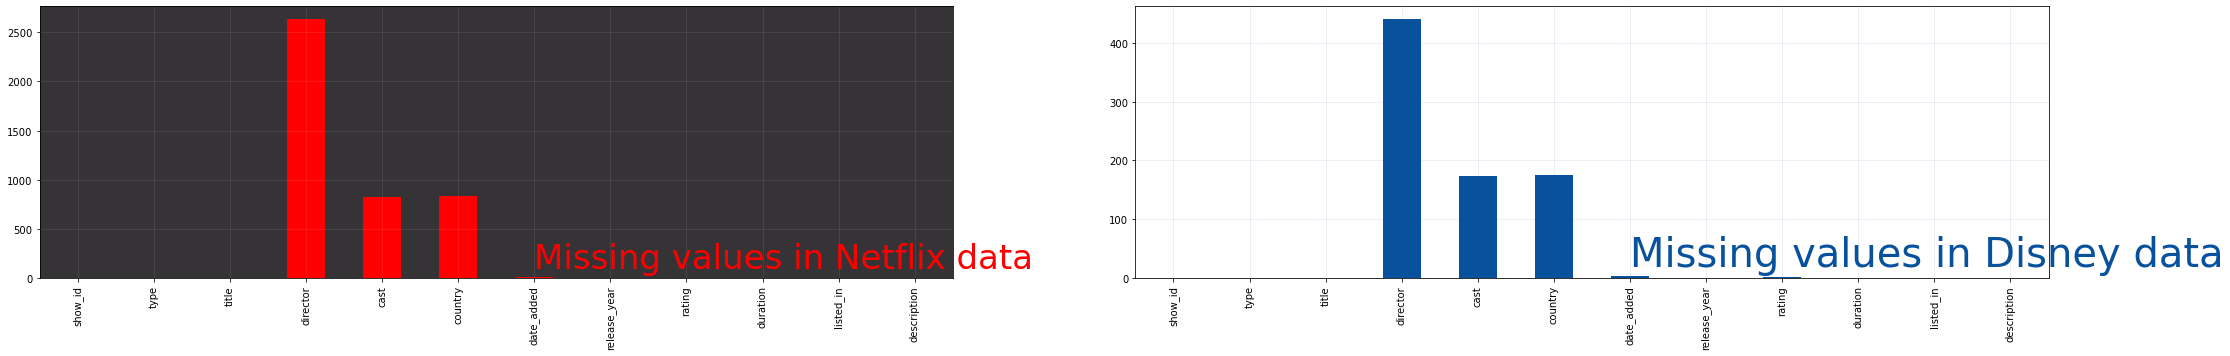

In [10]:
fig, axs = plt.subplots(1,2, figsize=(36, 5))
#plotting missing values in Netflix data
pd.DataFrame(round(dfn.isnull().sum())).plot(kind='bar',color='red', ax=axs[0],legend=False)
axs[0].patch.set_facecolor('#363336')
axs[0].grid(True, alpha=0.1, color='white')
axs[0].text(s="Missing values in Netflix data", x=6, y=100, fontsize=34, color = 'red')
axs[0].set_facecolor("#363336")

#plotting missing values in Disney data
pd.DataFrame(round(dfd.isnull().sum())).plot(kind='bar', color = '#08519D', ax=axs[1], legend=False)
axs[1].patch.set_facecolor('white')
axs[1].grid(True, alpha=0.1, color='#08519D')
axs[1].text(s="Missing values in Disney data", x=6, y=20, fontsize=40, color = '#08519D');

In [11]:
#investigating missing values
dfn.dropna(subset = ['date_added'], how='any', inplace=True)
dfn.dropna(subset = ['rating'],how='any', inplace=True)
dfn.dropna(subset = ['duration'],how='any', inplace=True)
dfd.dropna(subset = ['rating'],how='any', inplace=True)
dfd.dropna(subset = ['date_added'], how='any', inplace=True)

# adding new columns 
dfd["date_added"], dfn["date_added"] = pd.to_datetime(dfd['date_added']), pd.to_datetime(dfd['date_added'])

dfd['m_added'], dfn['m_added']= dfd['date_added'].dt.month, dfn['date_added'].dt.month
dfd['mnadded'], dfn['mnadded']=dfd['date_added'].dt.month_name(), dfn['date_added'].dt.month_name()
dfd['y_added'], dfn['y_added'] = dfd['date_added'].dt.year, dfn['date_added'].dt.year

#changing datatypes to category
col_cat = ['type', 'title', 'director', 'cast', 'country', 'date_added',
         'rating', 'duration', 'listed_in', 'description']
for i in col_cat:
    dfn[i] = dfn[i].astype('category')
    dfd[i] = dfd[i].astype('category')
    
dfdad = dfd.copy()

In [12]:
dfdad

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,m_added,mnadded,y_added
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,9,September,2021
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...,9,September,2021
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,9,September,2021
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,2021-09-22,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...,9,September,2021
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,2021-09-22,2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...,9,September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,s1361,TV Show,Smart Guy,NaN,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,2019-10-01,1996,TV-G,3 Seasons,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,10,October,2019
1361,s1362,Movie,The Cat from Outer Space,Norman Tokar,"Ken Berry, Sandy Duncan, Harry Morgan, Roddy M...",United States,2019-10-01,1978,G,104 min,"Comedy, Family, Science Fiction",A physicist tries to help an alien cat after i...,10,October,2019
1362,s1363,Movie,The Great Mouse Detective,"John Musker, Ron Clements, Dave Michener","Vincent Price, Barrie Ingham, Val Bettin, Susa...",United States,2019-10-01,1986,G,75 min,"Animation, Family, Mystery",A super-sleuth mouse must solve a toy maker's ...,10,October,2019
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,2019-10-01,1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...,10,October,2019
